In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size =(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1,1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2
output_size = 1

# Determining the model
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                            kernel_initializer = tf.random_uniform_initializer(minval=-0.10,maxval=0.10),
                            bias_initializer = tf.random_uniform_initializer(minval=-0.10,maxval=0.10))
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

#model.compile(optimizer = custom_optimizer,loss='mean_squared_error')
model.compile(optimizer = custom_optimizer,loss='huber_loss')

model.fit(training_data['inputs'], training_data['targets'], epochs = 200, verbose =2) 

Train on 1000 samples
Epoch 1/200
1000/1000 - 0s - loss: 17.6675
Epoch 2/200
1000/1000 - 0s - loss: 16.9386
Epoch 3/200
1000/1000 - 0s - loss: 16.2128
Epoch 4/200
1000/1000 - 0s - loss: 15.4937
Epoch 5/200
1000/1000 - 0s - loss: 14.7787
Epoch 6/200
1000/1000 - 0s - loss: 14.0669
Epoch 7/200
1000/1000 - 0s - loss: 13.3653
Epoch 8/200
1000/1000 - 0s - loss: 12.6730
Epoch 9/200
1000/1000 - 0s - loss: 11.9851
Epoch 10/200
1000/1000 - 0s - loss: 11.2992
Epoch 11/200
1000/1000 - 0s - loss: 10.6282
Epoch 12/200
1000/1000 - 0s - loss: 9.9676
Epoch 13/200
1000/1000 - 0s - loss: 9.3280
Epoch 14/200
1000/1000 - 0s - loss: 8.7020
Epoch 15/200
1000/1000 - 0s - loss: 8.1076
Epoch 16/200
1000/1000 - 0s - loss: 7.5353
Epoch 17/200
1000/1000 - 0s - loss: 6.9888
Epoch 18/200
1000/1000 - 0s - loss: 6.4818
Epoch 19/200
1000/1000 - 0s - loss: 6.0260
Epoch 20/200
1000/1000 - 0s - loss: 5.6171
Epoch 21/200
1000/1000 - 0s - loss: 5.2648
Epoch 22/200
1000/1000 - 0s - loss: 4.9670
Epoch 23/200
1000/1000 - 0s - 

Epoch 189/200
1000/1000 - 0s - loss: 0.2100
Epoch 190/200
1000/1000 - 0s - loss: 0.2075
Epoch 191/200
1000/1000 - 0s - loss: 0.2053
Epoch 192/200
1000/1000 - 0s - loss: 0.2031
Epoch 193/200
1000/1000 - 0s - loss: 0.2011
Epoch 194/200
1000/1000 - 0s - loss: 0.1990
Epoch 195/200
1000/1000 - 0s - loss: 0.1972
Epoch 196/200
1000/1000 - 0s - loss: 0.1954
Epoch 197/200
1000/1000 - 0s - loss: 0.1937
Epoch 198/200
1000/1000 - 0s - loss: 0.1924
Epoch 199/200
1000/1000 - 0s - loss: 0.1909
Epoch 200/200
1000/1000 - 0s - loss: 0.1895


In [5]:
# getting the weights and biases
model.layers[0].get_weights()

[array([[ 1.9914271],
        [-2.9977422]], dtype=float32),
 array([4.774561], dtype=float32)]

In [6]:
val = model.predict_on_batch(training_data['inputs'])
np.array(val).round(1)

array([[ -2.1],
       [ 11.2],
       [ 17.2],
       [  4.7],
       [-24.7],
       [ -6.3],
       [ 26.6],
       [ 26.4],
       [  9.4],
       [ 38.8],
       [ 21.6],
       [ 24. ],
       [  7.9],
       [ -5.1],
       [-28. ],
       [ 23.6],
       [ 29.4],
       [ 11.9],
       [ 17.8],
       [-12.4],
       [ 50.7],
       [ 24.6],
       [-26.8],
       [-28.3],
       [ -6. ],
       [ 11.6],
       [  3.2],
       [-30.9],
       [-13. ],
       [-11.9],
       [ -6.4],
       [-35.3],
       [  3.7],
       [ 37.8],
       [-27. ],
       [  9.6],
       [ 14.2],
       [  7.5],
       [ 16.6],
       [  1.8],
       [ 24.7],
       [ 46.3],
       [-19.1],
       [ 10.2],
       [-14.6],
       [ 31.1],
       [ 34.7],
       [ 12.4],
       [ 28.7],
       [ -4.9],
       [ 40.7],
       [ 38.8],
       [-10.3],
       [-15.6],
       [ 31.5],
       [  8.2],
       [  3.1],
       [ 22.9],
       [-12.2],
       [  6.2],
       [ -4.5],
       [  9.8],
       [

In [7]:
training_data['targets'].round(1)

array([[ -2.6],
       [ 11.6],
       [ 17.1],
       [  5.2],
       [-25.5],
       [ -6.4],
       [ 27.9],
       [ 27.6],
       [  9. ],
       [ 38.6],
       [ 21.5],
       [ 25.3],
       [  7.3],
       [ -4.2],
       [-27.9],
       [ 24.3],
       [ 29.4],
       [ 11.1],
       [ 17.9],
       [-12.4],
       [ 51.2],
       [ 25.5],
       [-26.4],
       [-28.4],
       [ -5.8],
       [ 11.7],
       [  4.2],
       [-30.6],
       [-12.1],
       [-11.8],
       [ -6.4],
       [-34.3],
       [  4.5],
       [ 37.4],
       [-27.8],
       [  8.9],
       [ 13.7],
       [  7.8],
       [ 16.4],
       [  1. ],
       [ 24.4],
       [ 45.7],
       [-19.3],
       [ 11.1],
       [-13.9],
       [ 30.6],
       [ 35.6],
       [ 12. ],
       [ 29.5],
       [ -4. ],
       [ 40.8],
       [ 38.3],
       [ -9.4],
       [-15.8],
       [ 31.4],
       [  9.4],
       [  3.3],
       [ 22.5],
       [-11.3],
       [  5.8],
       [ -4.3],
       [ 10.5],
       [

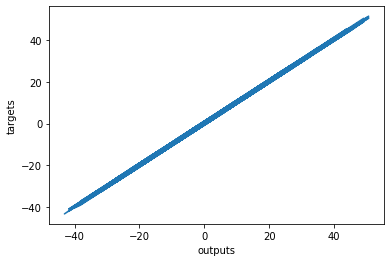

In [8]:
plt.plot(np.squeeze(val),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

In [9]:
val[1:10]

<tf.Tensor: id=13280, shape=(9, 1), dtype=float32, numpy=
array([[ 11.188388 ],
       [ 17.189762 ],
       [  4.6526413],
       [-24.727163 ],
       [ -6.267474 ],
       [ 26.62956  ],
       [ 26.386436 ],
       [  9.3839245],
       [ 38.775208 ]], dtype=float32)>